**IMPORTS**

In [49]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
import string
import cv2
import matplotlib.pyplot as plt
import unidecode

**OPEN TEXT DOCUMENT AND IMAGES DOCUMENT**

In [50]:
def openDocument(path):
    return open(path, 'r', errors = 'ignore', encoding = '#utf-8')

In [51]:
f = openDocument('DataText//PierreInfoText.txt')
fimg = openDocument('DataImages//ImagesTitres.txt')

**TOKENIZATION**

In [52]:
def tokenization(doc):
    raw_doc = doc.read()
    raw_doc = raw_doc.lower()
    # nltk.download('punkt')
    # nltk.download('wordnet')
    # nltk.download('omw-1.4')
    # nltk.download('stopwords')
    return nltk.sent_tokenize(raw_doc), nltk.word_tokenize(raw_doc)

In [53]:
sent_tokens, word_tokens = tokenization(f)
sent_tokens_img, word_tokens_img = tokenization(fimg)

In [54]:
sent_tokens[:3]

['le tailleur de pierre conçoit sur mesure des éléments architecturaux ou décoratifs en pierre de taille\n  les métiers de la pierre regroupent plusieurs activités artisanales.',
 "elles commencent avec l'extraction de la pierre et le métier de carrier.",
 'celui de tailleur de pierre et de marbrier de décoration et funéraire, incluant le métier de graveur.']

In [55]:
word_tokens[:2]

['le', 'tailleur']

In [56]:
sent_tokens_img[:]

['carrières de france.',
 'protection des voix respiratoires.',
 'marbre blanc lisse.']

**TEXT PROCESSING**

In [57]:
def remPunct():
    return dict((ord(punct), None) for punct in string.punctuation)

In [58]:
remove_punct_dict = remPunct()

In [59]:
def LemTokens(tokens):
    lemmer = nltk.stem.WordNetLemmatizer()
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

**REPONSE GENERATION**

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
def response(user_response, sentTokens):
    robo1_response = ''

    final_stopwords_list = stopwords.words('french')
    TfidfVec = TfidfVectorizer(
    stop_words=final_stopwords_list,
    tokenizer=LemNormalize,
    )
    
    #TfidfVec = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english')
    tfidf = TfidfVec.fit_transform(sentTokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo1_response =  robo1_response + "Désolé, je ne comprends pas! Pourrais tu reformuler la phrase?"
        return robo1_response
    else:
        robo1_response = robo1_response + sentTokens[idx]
        
        return robo1_response

**NLP**

In [62]:
def nlp(wordTokens, sentTokens, userResponse):
    sentTokens.append(userResponse)
    wordTokens = wordTokens + nltk.word_tokenize(userResponse)
    final_words = list(set(wordTokens))
    return response(userResponse, sentTokens)

**IMAGES**

*IMAGE TITLE*

In [63]:
def textToImgTitle(responseUser):
    TitleImage = unidecode.unidecode(responseUser).replace(" ","").replace(".","")
    return TitleImage

*LOAD IMAGE*

In [64]:
def loadImage(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

*PLOT IMAGE*

In [65]:
def plotImage(title, i):
    plt.figure(title)
    plt.imshow(i, cmap="gray")
    return plt.show()

**START AND END PROTOCOL**

*INTRODUCTION*

In [66]:
def introduction(introSentence):
    return input(introSentence)

*INFORMATIONS*

In [67]:
def informations(flagT, wordTokens):
    print('BOT: Je vous écoute! Veuillez me poser une question sur le monde du taille de la pierre.\nLe moins de mots vous inserez, le plus facile sera pour moi de vous donner une réponse pertinente :)')
    while(flagT == True):
        user_response = input()
        user_response = user_response.lower()
        if(user_response != 'sortie'):
            if(user_response == 'merci' or user_response == 'merci beaucoup'):
                flagT = False
                print('BOT: Aucun problème!')
            else:
                nlp(word_tokens, sent_tokens, user_response)
                print("BOT: ", end = "")
                print(response(user_response, sent_tokens))                
                sent_tokens.remove(user_response)
                
                try:
                    nlp(word_tokens_img, sent_tokens_img, user_response)               
                    titleImage = textToImgTitle(response(user_response, sent_tokens_img))
                    imgColor = loadImage("DataImages//"+titleImage+".jpg")
                    plotImage("Color", imgColor)
                    #print("BOT: ", end = "")
                    print(response(user_response, sent_tokens_img))
                    
                except:
                    print('BOT: Aucune photo disponible')
                sent_tokens_img.remove(user_response)
                
                print("BOT: Si je ne réponds pas correctement à votre question, essayez de la reformuler. Si vous avez une autre question n'hésitez pas à me la poser!")

        else:
            flagT = False
            print("BOT: Au revoir! A bientôt")

*ERREURS*

In [68]:
def erreur():
    print("hello")

*PROTOCOL*

In [69]:
def protocol(wordTokens):
    flag = True
    intro = introduction('BOT: Bonjour, je suis votre assistant aujourd\'hui. Comment puis-je vous aider ?\nSi vous avez un message d\'erreur, tapez "erreur", si vous voulez en savoir plus sur le monde de la pierre, tapez "info".\nTapez "sortie" à tout moment quand vouz souhaitez quitter la conversation\n')
    
    while intro.lower() not in ['info', 'erreur', 'sortie']:
        intro = str(input('BOT: Désolé, il semble y avoir un problème. Veuillez taper soit le mot \"info\" soit le mot \"erreur\"\n'))
    
    if intro.lower() == 'info':
        informations(flag, wordTokens)
    
    if intro.lower() == 'erreur':
        erreur()
    
    else:
        print("BOT: Au revoir! A bientôt")

BOT: Bonjour, je suis votre assistant aujourd'hui. Comment puis-je vous aider ?
Si vous avez un message d'erreur, tapez "erreur", si vous voulez en savoir plus sur le monde de la pierre, tapez "info".
Tapez "sortie" à tout moment quand vouz souhaitez quitter la conversation
info
BOT: Je vous écoute! Veuillez me poser une question sur le monde du taille de la pierre.
Le moins de mots vous inserez, le plus facile sera pour moi de vous donner une réponse pertinente :)
marbre
BOT: en réalité, le marbre n'est pas froid, mais lorsqu'on touche du marbre, la chaleur de notre corps se diffuse rapidement dans la roche qui est, elle, à la température ambiante.


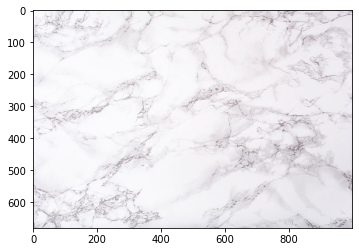

marbre blanc lisse.
BOT: Si je ne réponds pas correctement à votre question, essayez de la reformuler. Si vous avez une autre question n'hésitez pas à me la poser!


In [ ]:
protocol(word_tokens)